In [1]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

In [2]:
# case 2
N=100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

In [16]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Sequential(
            nn.Linear(2, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 1),
            nn.Sigmoid(),            
        )
    def forward(self, x):
        x = self.linear(x)
        return x

In [17]:
EPOCH = 100
LR = 1e-1

model = MLP()
optimizer = optim.Adam(model.parameters(), lr=LR)

loss_history = []

model.train()
for ep in range(EPOCH):
    y_hat = model(X)
    loss = F.binary_cross_entropy(y_hat, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #print loss
    loss_history += [loss.item()]
    print(f"Epoch {ep+1}, train_loss: {round(loss.item(),3)}")
    print("-"*20)

Epoch 1, train_loss: 0.685
--------------------
Epoch 2, train_loss: 1.637
--------------------
Epoch 3, train_loss: 2.352
--------------------
Epoch 4, train_loss: 0.641
--------------------
Epoch 5, train_loss: 0.27
--------------------
Epoch 6, train_loss: 0.659
--------------------
Epoch 7, train_loss: 0.496
--------------------
Epoch 8, train_loss: 0.323
--------------------
Epoch 9, train_loss: 0.253
--------------------
Epoch 10, train_loss: 0.227
--------------------
Epoch 11, train_loss: 0.203
--------------------
Epoch 12, train_loss: 0.164
--------------------
Epoch 13, train_loss: 0.125
--------------------
Epoch 14, train_loss: 0.092
--------------------
Epoch 15, train_loss: 0.063
--------------------
Epoch 16, train_loss: 0.043
--------------------
Epoch 17, train_loss: 0.027
--------------------
Epoch 18, train_loss: 0.016
--------------------
Epoch 19, train_loss: 0.009
--------------------
Epoch 20, train_loss: 0.006
--------------------
Epoch 21, train_loss: 0.003
--

Text(0, 0.5, 'Loss')

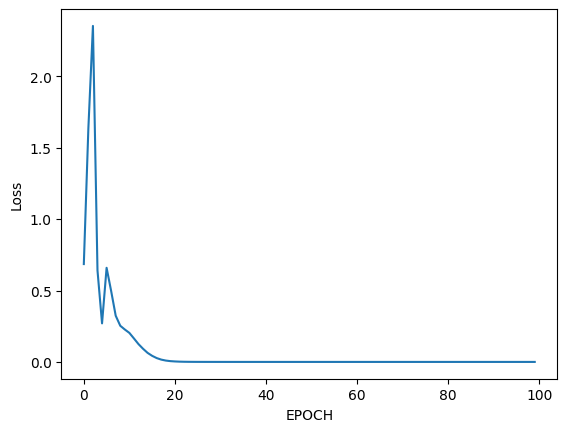

In [18]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel("EPOCH")
plt.ylabel("Loss")

In [19]:
x1_test = torch.linspace(-2,2,30)
x2_test = torch.linspace(-2,2,30)
X1_test,X2_test=torch.meshgrid(x1_test,x2_test)
X_test=torch.cat([X1_test.unsqueeze(dim=2),X2_test.unsqueeze(dim=2)],dim=2)

In [20]:
model.eval()
with torch.no_grad():
    y_hat = model(X_test)

y_hat = y_hat.squeeze()

Text(0.5, 0.5, 'x2')

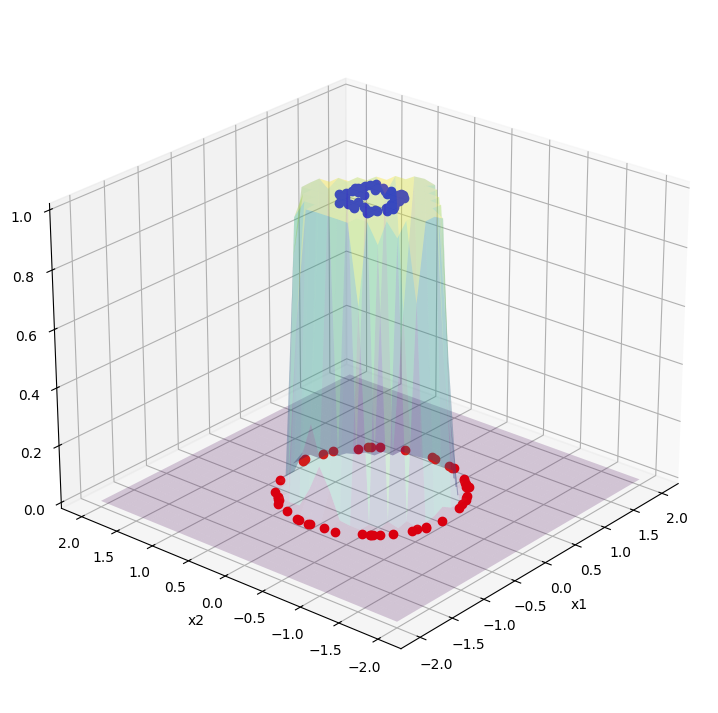

In [21]:
plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test, X2_test, y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")